(480, 640, 1)
torch.Size([1, 1, 240, 320])


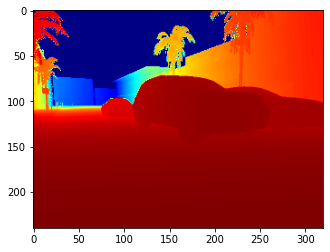

(240, 320)


In [57]:
import os
import numpy as np
import cv2

import matplotlib.pyplot as plt
from PIL import Image
import torch

folder_path = '/home/zubairirshad/pd-api-py/data/PDMultiObj_Single_Scene/SF_6thAndMission_medium2/train'

file_path = 'suv_medium_02-101.png'
depth_endpath = file_path.split('.')[0]+'.npz'
depth_path_gt = os.path.join(folder_path,'depth', depth_endpath)


depth = np.clip(np.load(depth_path_gt, allow_pickle=True)['arr_0'], 0,100)

print(depth.shape)
depth_resized = torch.FloatTensor(depth).squeeze(-1).unsqueeze(0).unsqueeze(0)
depth_resized = torch.nn.functional.interpolate(depth_resized, scale_factor=0.5,
                           mode='bilinear', align_corners=True)

print(depth_resized.shape)

depth = depth_resized.squeeze().numpy()

depth_img = (depth - np.min(depth)) / (max(np.max(depth) - np.min(depth), 1e-8))
depth_img = cv2.applyColorMap((depth_img * 255).astype(np.uint8), cv2.COLORMAP_JET)
plt.imshow(depth_img)
plt.show()

print(depth.shape)



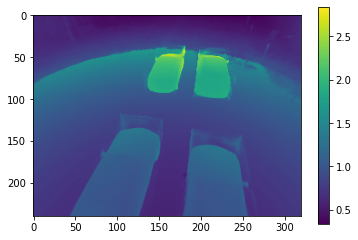

In [4]:
import numpy as np
import numpy as np
import cv2

import matplotlib.pyplot as plt
from PIL import Image
import torch
depth_path_pred = '/home/zubairirshad/Downloads/depth_raw002.npz'


depth_pred = np.clip(np.load(depth_path_pred, allow_pickle=True)['arr_0'], 0,100)
# depth_pred = depth_pred * np.median(depth) / np.median(depth_pred)
# depth_pred = np.clip(depth_pred, 0.1, 100)



# depth_img_pred = (depth_pred - np.min(depth_pred)) / (max(np.max(depth_pred) - np.min(depth_pred), 1e-8))
# depth_img_pred = cv2.applyColorMap((depth_img_pred * 255).astype(np.uint8), cv2.COLORMAP_JET)
plt.imshow(depth_pred)
plt.colorbar()
plt.show()

In [64]:

print(depth, np.min(depth), np.max(depth))
print(depth_pred, np.min(depth_pred), np.max(depth_pred))

[[100.        100.        100.        ...  16.2644     16.207022
   16.150036 ]
 [100.        100.         99.99769   ...  16.268028   16.210623
   16.153614 ]
 [ 99.26536    99.2654     12.051207  ...  16.271656   16.214224
   16.15719  ]
 ...
 [  1.4640192   1.4634994   1.46298   ...   1.3032848   1.3028717
    1.3024591]
 [  1.4528482   1.4523362   1.4518248 ...   1.2943223   1.2939152
    1.2935078]
 [  1.4418463   1.4413421   1.4408383 ...   1.2854824   1.2850804
    1.2846787]] 1.2846787 100.000015
[[6.925487  8.0964985 9.0300865 ... 7.0174775 7.0468097 7.038856 ]
 [8.7440605 9.006217  9.254666  ... 7.079172  7.053187  7.0370064]
 [9.095624  9.261426  9.332186  ... 7.157158  7.1255636 7.0713634]
 ...
 [2.9121907 2.9219537 2.9406126 ... 6.5910397 6.5428505 6.4476924]
 [3.0236666 3.0217888 3.0296624 ... 6.9578385 6.92578   6.830564 ]
 [3.1138318 3.1238098 3.1295767 ... 7.192374  7.1835494 7.1368046]] 0.1 33.453785


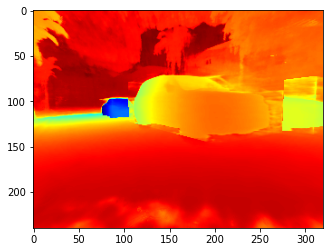

In [66]:
import torch


diff_i = depth - depth_pred
abs_rel = np.mean(np.abs(diff_i) / depth)
sq_rel = np.mean(diff_i ** 2 / depth)
rmse = np.sqrt(np.mean(diff_i ** 2))

print(abs_rel, sq_rel, rmse)

0.8392246 21.191374 40.993263


In [9]:
import torch
import torch.nn as nn

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(10, 1)
    def forward(self, x):
        x = self.fc(x)
        return x
    
# Instantiate the model
model = Net()
# Define the loss function
criterion = nn.BCEWithLogitsLoss()
# Generate some fake data
inputs = torch.randn(32, 10)
targets = torch.randint(0, 2, (32,), dtype=torch.float)
# Get the logits from the model
logits = model(inputs)

print(logits.shape, targets.type())
# Calculate the loss

print(logits, targets)
loss = criterion(logits.squeeze(), targets.long())
print(loss)

torch.Size([32, 1]) torch.FloatTensor
tensor([[ 0.6770],
        [ 0.5616],
        [-0.1177],
        [ 0.3739],
        [-0.4806],
        [-0.5983],
        [-0.1333],
        [ 0.1969],
        [-0.3550],
        [-0.5544],
        [-0.1872],
        [-0.2365],
        [-0.2675],
        [-0.5678],
        [ 0.3219],
        [-0.2180],
        [ 0.6157],
        [-0.4610],
        [ 0.6210],
        [-0.2345],
        [ 0.4147],
        [ 0.0833],
        [ 0.3418],
        [ 0.7602],
        [-0.4101],
        [ 0.0202],
        [ 0.0585],
        [ 0.7515],
        [ 0.2058],
        [ 0.0376],
        [-0.3135],
        [-0.0031]], grad_fn=<AddmmBackward0>) tensor([0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.])


RuntimeError: result type Float can't be cast to the desired output type Long

In [12]:
import torch

t_vals = torch.linspace(0.0, 1.0, 64 + 1)

print(t_vals.shape)

print(t_vals)

torch.Size([65])
tensor([0.0000, 0.0156, 0.0312, 0.0469, 0.0625, 0.0781, 0.0938, 0.1094, 0.1250,
        0.1406, 0.1562, 0.1719, 0.1875, 0.2031, 0.2188, 0.2344, 0.2500, 0.2656,
        0.2812, 0.2969, 0.3125, 0.3281, 0.3438, 0.3594, 0.3750, 0.3906, 0.4062,
        0.4219, 0.4375, 0.4531, 0.4688, 0.4844, 0.5000, 0.5156, 0.5312, 0.5469,
        0.5625, 0.5781, 0.5938, 0.6094, 0.6250, 0.6406, 0.6562, 0.6719, 0.6875,
        0.7031, 0.7188, 0.7344, 0.7500, 0.7656, 0.7812, 0.7969, 0.8125, 0.8281,
        0.8438, 0.8594, 0.8750, 0.8906, 0.9062, 0.9219, 0.9375, 0.9531, 0.9688,
        0.9844, 1.0000])


In [15]:
t_vals = torch.broadcast_to(t_vals, (1024, 64 + 1))
print(t_vals.shape)
print(t_vals)


t_vals = torch.flip(
    t_vals,
    dims=[
        -1,
    ],
)  # 1.0 -> 0.0

print(t_vals.shape)
print(t_vals)

torch.Size([1024, 65])
tensor([[0.0000, 0.0156, 0.0312,  ..., 0.9688, 0.9844, 1.0000],
        [0.0000, 0.0156, 0.0312,  ..., 0.9688, 0.9844, 1.0000],
        [0.0000, 0.0156, 0.0312,  ..., 0.9688, 0.9844, 1.0000],
        ...,
        [0.0000, 0.0156, 0.0312,  ..., 0.9688, 0.9844, 1.0000],
        [0.0000, 0.0156, 0.0312,  ..., 0.9688, 0.9844, 1.0000],
        [0.0000, 0.0156, 0.0312,  ..., 0.9688, 0.9844, 1.0000]])
torch.Size([1024, 65])
tensor([[1.0000, 0.9844, 0.9688,  ..., 0.0312, 0.0156, 0.0000],
        [1.0000, 0.9844, 0.9688,  ..., 0.0312, 0.0156, 0.0000],
        [1.0000, 0.9844, 0.9688,  ..., 0.0312, 0.0156, 0.0000],
        ...,
        [1.0000, 0.9844, 0.9688,  ..., 0.0312, 0.0156, 0.0000],
        [1.0000, 0.9844, 0.9688,  ..., 0.0312, 0.0156, 0.0000],
        [1.0000, 0.9844, 0.9688,  ..., 0.0312, 0.0156, 0.0000]])
